[Paper](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=9557441)

[code](https://github.com/void-mckenzie/BreaKHis_Image_Analysis/blob/main/.ipynb_checkpoints/code_for_paper-checkpoint.ipynb)

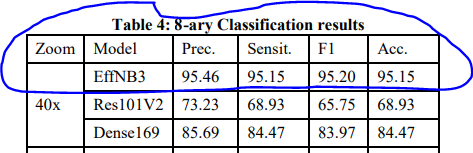

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from __future__ import print_function
from __future__ import division
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import torch.utils.data as data
from torch.utils.data import Subset, DataLoader, random_split
from torchvision.datasets import ImageFolder
from sklearn.model_selection import train_test_split
from torchvision.transforms import Compose, ToTensor, Resize
from torch.optim.lr_scheduler import ExponentialLR, StepLR, ReduceLROnPlateau
from sklearn import metrics
from torch.nn import functional as F
import cv2
import tensorflow as tf
import keras
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from keras import callbacks
from keras import optimizers
from keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

import torch
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import ImageFolder


import matplotlib.pyplot as plt
import time
import os
import copy
print("PyTorch Version: ",torch.__version__)
print("Torchvision Version: ",torchvision.__version__)





# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

PyTorch Version:  1.10.0+cu111
Torchvision Version:  0.11.1+cu111


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale = 1./255)
       # rotation_range=40,
       # height_shift_range=0.2,
       # shear_range=0.2,
       # zoom_range=0.2,
       # horizontal_flip=True,
       # fill_mode='nearest')
valid_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    directory="/content/drive/My Drive/BreaKHis2_8_trial/BreaKHis8_train/",
    target_size=(230, 350),    #300, 300
    color_mode="rgb",
    batch_size=16,
    class_mode="categorical",
    shuffle=True,
    seed=42
)
valid_generator = valid_datagen.flow_from_directory(
    directory="/content/drive/My Drive/BreaKHis2_8_trial/BreaKHis8_val/",
    target_size=(230, 350),
    color_mode="rgb",
    batch_size=16,
    class_mode="categorical",
    shuffle=False,
    seed=42
)

Found 480 images belonging to 8 classes.
Found 40 images belonging to 8 classes.


In [ ]:
print("label map for train: ",train_generator.class_indices)
print("")
print("----")
print("")
print("label map for val data: ",valid_generator.class_indices)

label map for train:  {'benign_adenosis': 0, 'benign_fibroadenoma': 1, 'benign_phyllodestumor': 2, 'benign_tubularadenoma': 3, 'malignant_ductalcarcinoma': 4, 'malignant_lobularcarcinoma': 5, 'malignant_mucinouscarcinoma': 6, 'malignant_papillarycarcinoma': 7}

----

label map for val data:  {'benign_adenosis': 0, 'benign_fibroadenoma': 1, 'benign_phyllodestumor': 2, 'benign_tubularadenoma': 3, 'malignant_ductalcarcinoma': 4, 'malignant_lobularcarcinoma': 5, 'malignant_mucinouscarcinoma': 6, 'malignant_papillarycarcinoma': 7}


In [ ]:
print("Train classes: ",train_generator.classes)
print("")
print("Valid classes: ",valid_generator.classes)

Train classes:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]

Valid cla

#Efficient B3

In [ ]:
from tensorflow.keras.applications import EfficientNetB3

In [ ]:
input_shape = (230, 350, 3)            #tf.keras.applications.EfficientNetB3
base_model = EfficientNetB3(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=input_shape)
base_model.summary()

43950080/43941136 [==============================] - 1s 0us/step
Model: "efficientnetb3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 230, 350, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 230, 350, 3)  0           ['input_3[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 230, 350, 3)  7          ['rescaling_1[0][0]']            
 )                                                                                                
                    

In [ ]:
for layer in base_model.layers:
    layer.trainable = False  #True

In [ ]:
import tensorflow_hub as hub
inputs = tf.keras.layers.Input(shape=[230, 350, 3])

headModel = base_model.output
headModel = tf.keras.layers.GlobalAveragePooling2D()(headModel)
headModel = tf.keras.layers.Dense(256, activation="relu")(headModel)
headModel = tf.keras.layers.Dropout(0.7)(headModel)

headModel = tf.keras.layers.Dense(8, activation="softmax")(headModel)


model = tf.keras.Model(base_model.inputs, headModel)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 230, 350, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 230, 350, 3)  0           ['input_3[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 230, 350, 3)  7          ['rescaling_1[0][0]']            
 )                                                                                                
                                                                                            

In [ ]:
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import schedules

epochs = 50
batch_size = 32  #default

#Choose between binary_crossentropy and categorical_crossentropy

model.compile(loss="categorical_crossentropy", optimizer="nadam",metrics=["accuracy"])

history = model.fit(train_generator, shuffle = True, steps_per_epoch= 480//16 , validation_steps= 40//16,
          epochs=epochs, verbose=1,  validation_data = valid_generator)  #steps_per_epoch= 200, validation_steps= 200

Epoch 1/50
30/30 [==============================] - 26s 360ms/step - loss: 2.1801 - accuracy: 0.1354 - val_loss: 2.1124 - val_accuracy: 0.1562
Epoch 2/50
30/30 [==============================] - 7s 233ms/step - loss: 2.1233 - accuracy: 0.1271 - val_loss: 2.0903 - val_accuracy: 0.0000e+00
Epoch 3/50
30/30 [==============================] - 7s 232ms/step - loss: 2.0875 - accuracy: 0.1167 - val_loss: 2.0797 - val_accuracy: 0.1562
Epoch 4/50
30/30 [==============================] - 7s 232ms/step - loss: 2.0845 - accuracy: 0.1125 - val_loss: 2.0794 - val_accuracy: 0.1562
Epoch 5/50
30/30 [==============================] - 7s 233ms/step - loss: 2.0806 - accuracy: 0.1104 - val_loss: 2.0716 - val_accuracy: 0.1562
Epoch 6/50
30/30 [==============================] - 7s 233ms/step - loss: 2.0911 - accuracy: 0.1187 - val_loss: 2.0659 - val_accuracy: 0.1562
Epoch 7/50
30/30 [==============================] - 7s 233ms/step - loss: 2.0807 - accuracy: 0.1521 - val_loss: 2.0465 - val_accuracy: 0.1562
E

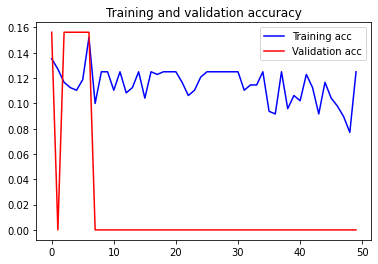

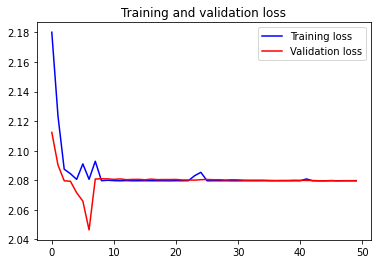

In [ ]:
import matplotlib.pyplot as plt
# Utility function for plotting of the model results
def visualize_results(history):
    # Plot the accuracy and loss curves
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()


# Run the function to illustrate accuracy and loss
visualize_results(history)

In [ ]:
model.save("/content/drive/My Drive/FEW_SHOT_MULTI_TASK/Comparison/paper6_enetb3.h5" )

In [ ]:
from keras.models import load_model
model = load_model('/content/drive/My Drive/FEW_SHOT_MULTI_TASK/Comparison/paper6_enetb3.h5')

#testing

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
test_generator = test_datagen.flow_from_directory(
    directory="/content/drive/My Drive/BreaKHis2_8_trial/BreaKHis8_test/",
    target_size=(230, 350),
    color_mode="rgb",
    batch_size=1,
    class_mode="categorical",  #None
    shuffle=False,
    #seed=42
)
nBatches = 1

Found 1876 images belonging to 8 classes.


In [ ]:
test_generator.reset()

In [ ]:
y_true = test_generator.classes

In [ ]:
print("Test images class lables: ",y_true)

Test images class lables:  [0 0 0 ... 7 7 7]


In [ ]:
pred=model.predict_generator(generator=test_generator, steps=test_generator.samples//nBatches, max_queue_size=10,
                                workers=1, use_multiprocessing=False, verbose=1)

1876/1876 [==============================] - 59s 30ms/step


In [ ]:
#y_pred = np.argmax(pred,axis=1)
print("Test images predicted labels: ", pred)

Test images predicted labels:  [[0.12493488 0.12488728 0.12488138 ... 0.12495805 0.12504198 0.12527986]
 [0.12493488 0.12488728 0.12488138 ... 0.12495805 0.12504198 0.12527986]
 [0.12493488 0.12488728 0.12488138 ... 0.12495805 0.12504198 0.12527986]
 ...
 [0.12493488 0.12488728 0.12488138 ... 0.12495805 0.12504198 0.12527986]
 [0.12493488 0.12488728 0.12488138 ... 0.12495805 0.12504198 0.12527986]
 [0.12493488 0.12488728 0.12488138 ... 0.12495805 0.12504198 0.12527986]]


In [ ]:
pred.shape

(1876, 8)

In [ ]:
y_prd = np.argmax(pred,axis=1)
print("y_prd shape: ",y_prd.shape)
print("")
print("y_true.shape", y_true.shape)

y_prd shape:  (1876,)

y_true.shape (1876,)


In [ ]:
score = model.evaluate_generator(generator=test_generator,
                                     steps=test_generator.samples//nBatches,
                                     max_queue_size=10,
                                     workers=1,
                                     use_multiprocessing=False,
                                     verbose=1)
print("Test loss: %.3f - Test acc: %.3f" % (score[0], score[1]))


1876/1876 [==============================] - 70s 36ms/step - loss: 2.0796 - accuracy: 0.0688
Test loss: 2.080 - Test acc: 0.069


In [ ]:
print(score)

[2.0795886516571045, 0.06876332312822342]


#EVALUATION

<font size = 5><font color="yellow">Confusion matrix & classification report

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_prd)
print('Confusion Matrix\n')
print(cm)

Confusion Matrix

[[  0   0   0   0   0   0   0  98]
 [  0   0   0   0   0   0   0 238]
 [  0   0   0   0   0   0   0  94]
 [  0   0   0   0   0   0   0 132]
 [  0   0   0   0   0   0   0 857]
 [  0   0   0   0   0   0   0 140]
 [  0   0   0   0   0   0   0 188]
 [  0   0   0   0   0   0   0 129]]


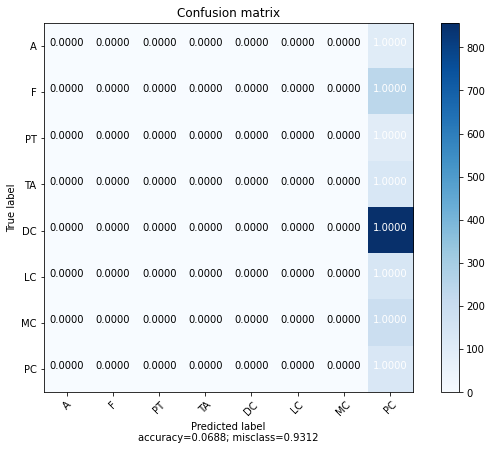

In [ ]:
import numpy as np
import itertools

target_names = ['A', 'F', 'PT', 'TA', 'DC','LC', 'MC', 'PC']

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):



    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

plot_confusion_matrix(cm, target_names,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          normalize=True)

In [ ]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_true, y_prd)))

print('Micro Precision: {:.2f}'.format(precision_score(y_true, y_prd, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_true, y_prd, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_true, y_prd, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_true, y_prd, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_true, y_prd, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_true, y_prd, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_true, y_prd, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_true, y_prd, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_true, y_prd, average='weighted')))


from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_true, y_prd, target_names=['Class 0- A:', 'Class 1- F:', 'Class 2- PT:', 'Class 3- TA:','Class 4- DC:','Class 5- LC:','Class 6- MC:', 'Class 7- PC:'], digits = 4))



Accuracy: 0.07

Micro Precision: 0.07
Micro Recall: 0.07
Micro F1-score: 0.07

Macro Precision: 0.01
Macro Recall: 0.12
Macro F1-score: 0.02

Weighted Precision: 0.00
Weighted Recall: 0.07
Weighted F1-score: 0.01

Classification Report

              precision    recall  f1-score   support

 Class 0- A:     0.0000    0.0000    0.0000        98
 Class 1- F:     0.0000    0.0000    0.0000       238
Class 2- PT:     0.0000    0.0000    0.0000        94
Class 3- TA:     0.0000    0.0000    0.0000       132
Class 4- DC:     0.0000    0.0000    0.0000       857
Class 5- LC:     0.0000    0.0000    0.0000       140
Class 6- MC:     0.0000    0.0000    0.0000       188
Class 7- PC:     0.0688    1.0000    0.1287       129

    accuracy                         0.0688      1876
   macro avg     0.0086    0.1250    0.0161      1876
weighted avg     0.0047    0.0688    0.0088      1876



<font size = 5><font color="yellow">ROC AUC score/curve

In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score
#roc auc score
scr1 = roc_auc_score(y_true, pred, multi_class='ovo', average='macro')
scr3 = roc_auc_score(y_true, pred, multi_class='ovr', average='macro')
scr2 = roc_auc_score(y_true, pred, multi_class='ovo', average='weighted')
scr4 = roc_auc_score(y_true, pred, multi_class='ovr', average='weighted')

print("macro - ovo ROC AUC Score: ", scr1)
print("")

print("weighted - ovo ROC AUC Score: ", scr2)
print("")

print("macro - ovr ROC AUC Score: ", scr3)
print("")

print("weighted - ovr ROC AUC Score: ", scr4)
print("")


macro - ovo ROC AUC Score:  0.5

weighted - ovo ROC AUC Score:  0.5

macro - ovr ROC AUC Score:  0.5

weighted - ovr ROC AUC Score:  0.5



class 0 - A  : --AUC---> 0.5
class 1 - F  : --AUC---> 0.5
class 2 - PT  : --AUC---> 0.5
class 3 - TA  : --AUC---> 0.5
class 4 - DC  : --AUC---> 0.5
class 5 - LC  : --AUC---> 0.5
class 6 - MC  : --AUC---> 0.5
class 7 - PC  : --AUC---> 0.5


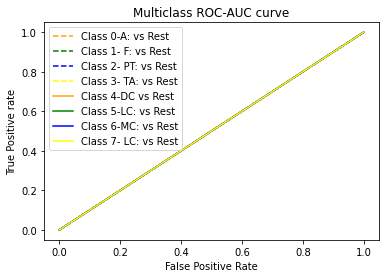

In [ ]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

target_names = ['A', 'F', 'PT', 'TA', 'DC','LC', 'MC', 'PC']
n_class = 8

for i in range(len(target_names)):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_true, y_prd[:], pos_label=i)
    auroc = round(metrics.auc(fpr[i], tpr[i]),2)
    print('class',i,'-', target_names[i],' :','--AUC--->',auroc)

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0-A: vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1- F: vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2- PT: vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3- TA: vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='-',color='orange', label='Class 4-DC vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='-',color='green', label='Class 5-LC: vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='-',color='blue', label='Class 6-MC: vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='-',color='yellow', label='Class 7- LC: vs Rest')


plt.title('Multiclass ROC-AUC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multilass ROC',dpi=300, bbox_inches='tight',   pad_inches = 0);


plt.show()